# Simple Markov Chain Example

Author: Aleksander Filip Żarnecki (University of Warsaw)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Consider an atom with three energy states: ground, meta-stable, excited

E = np.array([0.,1.,3.])     # Example energy levels

# Atom is iluminated with laser tuned to ground-excited state transition
# Excitation probability per time unit:

pge = 0.1

# Probability of deexcitation to the ground state (per time unit):

peg = 0.2

# But it has also a small probability of deexcitation to the meta-stable state

pem = 0.01

# Probability of meta-stable state decay to ground state (per time unit)

pmg = 0.002

# All other transfer probabilities are zero

In [3]:
# Build transfer matrix

T = np.array([[1-pge, 0., pge],
             [pmg, 1-pmg, 0.],
             [peg, pem, 1-peg-pem]])


In [4]:
# Initial vector of state probabilities

prob = np.array([1.,0.,0.])

# Use:
#   newprob = prob @ T
# or
#   newprob = np.transpose(T) @ prob

print("Initial probability vector: ", prob)

Initial probability vector:  [1. 0. 0.]


In [5]:
# Number of cycles to run 

Nmc = 10000

# History

state_hist = np.empty(shape=(Nmc+1,3))
state_hist[0,:] = prob

# Simulation loop

for t in range(Nmc):
    prob = prob @ T
    state_hist[t+1,:] = prob
    
print("Final probability vector: ", prob)

Final probability vector:  [0.25925926 0.61728395 0.12345679]


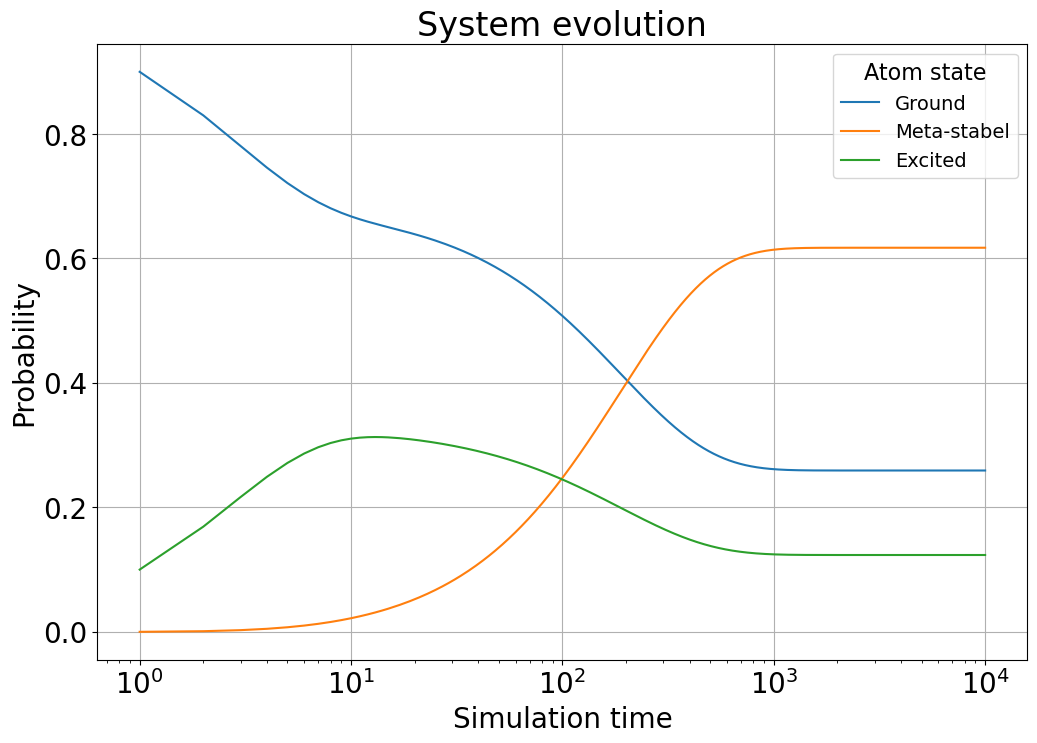

In [6]:
plt.figure(figsize=(12,8))
# plt.subplots(1,2,figsize=(18, 8))

# plt.subplot(121)

aval = np.linspace(0.,Nmc,Nmc+1)

plt.semilogx(aval[1:], state_hist[1:,0],label='Ground')
plt.semilogx(aval[1:], state_hist[1:,1],label='Meta-stabel')
plt.semilogx(aval[1:], state_hist[1:,2],label='Excited')

plt.xlabel('Simulation time',size=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability',size=20)
plt.yticks(fontsize=20)
plt.grid()
plt.title("System evolution",size=24)
plt.legend(title='Atom state',title_fontsize=16,fontsize=14);

fname = '14_atom3'

plt.savefig(fname)

plt.show()

### Analytical solution adapted from Herman Scheepers

https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e


In [7]:
# A=np.append(transpose(P)-identity(3),[[1,1,1]],axis=0)
# b=transpose(np.array([0,0,0,1]))
# np.linalg.solve(transpose(A).dot(A), transpose(A).dot(b))

A = np.append(np.transpose(T)-np.identity(3),[[1,1,1]],axis=0)
b = np.transpose(np.array([0,0,0,1]))

sol = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

print("Expected stationary solution probabilities: ",sol)

Expected stationary solution probabilities:  [0.25925926 0.61728395 0.12345679]
